## Importing the images into this script

In [1]:
import os
import numpy as np

directory = 'C:/Users/joaovitor/Desktop/Meu_Canal/DINO/'
jump_img = os.listdir(os.path.join(directory, 'jump'))
nojump_img = os.listdir(os.path.join(directory, 'no_jump'))

#checking if the number of images in both directories are equals
print(len(jump_img) == len(nojump_img))
print(len(jump_img))

False
81


## Storing the images array into lists

In [2]:
import cv2

imgs_list_jump = []
imgs_list_nojump = []

for img in jump_img:
    images = cv2.imread(os.path.join(directory, 'jump', img), 0) #0 to convert the image to grayscale
    imgs_list_jump.append(images)
    
for img in nojump_img:
    images = cv2.imread(os.path.join(directory, 'no_jump', img), 0) #0 to convert the image to grayscale
    imgs_list_nojump.append(images) 

#Taking a look at the first img of array_imgs_jump list
print(imgs_list_jump[0])
print(50*'=')
print('Images Dimensions:', imgs_list_jump[0].shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Images Dimensions: (480, 640)


## Let's display the first image

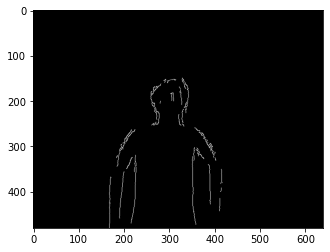

In [3]:
import matplotlib.pyplot as plt

img = cv2.cvtColor(imgs_list_jump[0], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## The images have 480 pixels height and 640 pixels width

In [4]:
print(imgs_list_jump[0].shape)

(480, 640)


## The images sizes still very big, so we are going to resize all images in order to make them smaller

In [5]:
print('Original size:', imgs_list_jump[0].size) #original size

Original size: 307200


## We will apply the code bellow to all images

Original Dimensions: (480, 640)
Resized Dimensions: (96, 128)


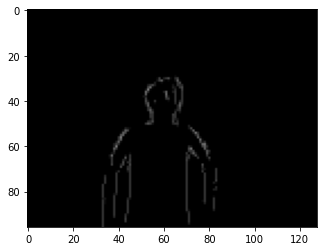

In [6]:
scale_percent = 20 #20 percent of original size

width = int(imgs_list_jump[0].shape[1] * scale_percent / 100)
height = int(imgs_list_jump[0].shape[0] * scale_percent / 100)

dim = (width, height)

#resize image
resized = cv2.resize(imgs_list_jump[0], dim, interpolation = cv2.INTER_AREA)

print('Original Dimensions:', imgs_list_jump[0].shape)
print('Resized Dimensions:', resized.shape)

img = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## Applying to all images

(96, 128)
(96, 128)


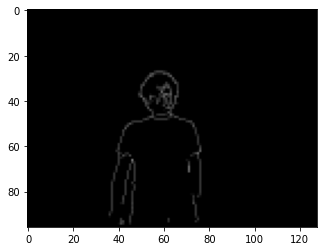

True

In [7]:
scale_percent = 20 # 20 percent of original size
resized_jump_list = []
resized_nojump_list = []

for img in imgs_list_jump:
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)

    dim = (width, height)

    #resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    resized_jump_list.append(resized)

for img in imgs_list_nojump:
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    
    dim = (width, height)
    
    #resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    resized_nojump_list.append(resized)

#Checking if it worked:
print(resized_jump_list[0].shape)
print(resized_nojump_list[0].shape)

img = cv2.cvtColor(resized_nojump_list[10], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

cv2.imwrite('imagem_resized.png', resized_nojump_list[10])

## Creating my X dataset

In [9]:
nojump_list_reshaped = []
jump_list_reshaped = []

for img in resized_nojump_list:
    nojump_list_reshaped.append(img.reshape(-1, img.size))

for img in resized_jump_list:
    jump_list_reshaped.append(img.reshape(-1, img.size))

X_nojump = np.array(nojump_list_reshaped).reshape(len(nojump_list_reshaped), nojump_list_reshaped[0].size)
X_jump = np.array(jump_list_reshaped).reshape(len(jump_list_reshaped), jump_list_reshaped[0].size)

print(X_nojump.shape)
print(X_jump.shape)

(386, 12288)
(81, 12288)


## Joining both X's

In [10]:
X = np.vstack([X_nojump, X_jump])
print(X.shape)

(467, 12288)


## Creating my Y dataset

In [11]:
y_nojump = np.array([0 for i in range(len(nojump_list_reshaped))]).reshape(len(nojump_list_reshaped),-1)
y_jump = np.array([1 for i in range(len(jump_list_reshaped))]).reshape(len(jump_list_reshaped),-1)

## Joining both Y's

In [12]:
y = np.vstack([y_nojump, y_jump])
print(y.shape)

(467, 1)


## Shuffling both datasets

In [13]:
shuffle_index = np.random.permutation(y.shape[0])
#print(shuffle_index)
X, y = X[shuffle_index], y[shuffle_index]

## Creating a X_train and y_train dataset

In [14]:
X_train = X
y_train = y

## Choosing SVM (Support Vector Machine) as our Machine Learning model

In [15]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train.ravel())

SVC(kernel='linear')

## Creating a confusion matrix to evaluate the model performance

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(svm_clf, X_train, y_train.ravel(), cv=3) #sgd_clf no primeiro parametro
confusion_matrix(y_train.ravel(), y_train_pred)

array([[381,   5],
       [ 16,  65]], dtype=int64)

## Saving the model

In [17]:
import joblib

joblib.dump(svm_clf, 'jump_model.pkl') #sgd_clf no primeiro parametro

['jump_model.pkl']